<a href="https://colab.research.google.com/github/ramjitampan/pyton_Ramzy/blob/main/Tugas4_Coding2_CitraDigital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

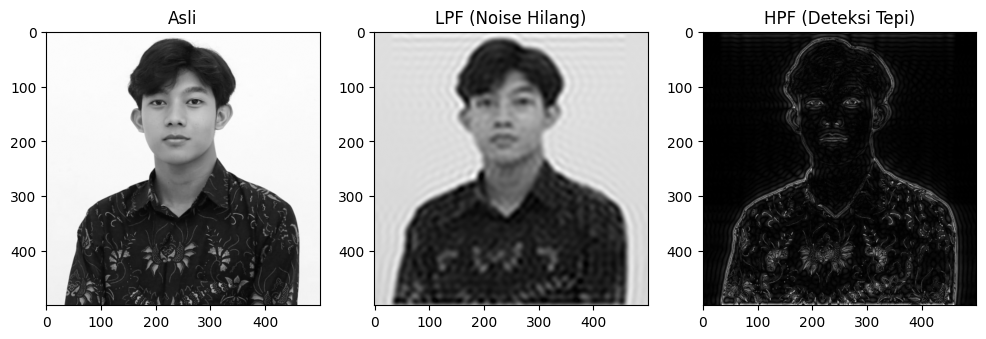

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar grayscale
img = cv2.imread("/content/FAHMI.png", 0)

# FFT
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = rows//2 , cols//2

# Low-Pass Filter (LPF) - hanya ambil pusat frekuensi
mask_lpf = np.zeros((rows, cols), np.uint8)
mask_lpf[crow-30:crow+30, ccol-30:ccol+30] = 1
f_lpf = fshift * mask_lpf
img_lpf = np.abs(np.fft.ifft2(np.fft.ifftshift(f_lpf)))

# High-Pass Filter (HPF) - hilangkan pusat frekuensi
mask_hpf = np.ones((rows, cols), np.uint8)
mask_hpf[crow-30:crow+30, ccol-30:ccol+30] = 0
f_hpf = fshift * mask_hpf
img_hpf = np.abs(np.fft.ifft2(np.fft.ifftshift(f_hpf)))

# Visualisasi
plt.figure(figsize=(12,6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Asli")
plt.subplot(132), plt.imshow(img_lpf, cmap='gray'), plt.title("LPF (Noise Hilang)")
plt.subplot(133), plt.imshow(img_hpf, cmap='gray'), plt.title("HPF (Deteksi Tepi)")
plt.show()


Ukuran Asli     : 91.16 KB
Ukuran Kompresi : 94.05 KB


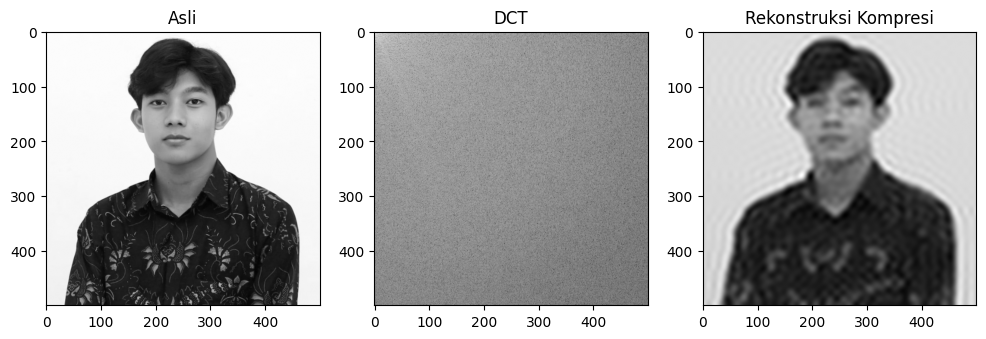

In [9]:
# Konversi ke float
img_float = np.float32(img) / 255.0

# DCT
dct = cv2.dct(img_float)

# Potong frekuensi tinggi (misal simpan 50x50 blok tengah saja)
dct_compressed = np.zeros_like(dct)
dct_compressed[:50, :50] = dct[:50, :50]

# Rekonstruksi citra dari DCT terkompres
img_reconstructed = cv2.idct(dct_compressed)

# Simpan file untuk banding ukuran
cv2.imwrite("original.png", img)
cv2.imwrite("compressed.png", np.uint8(img_reconstructed*255))

import os
size_original = os.path.getsize("original.png")
size_compressed = os.path.getsize("compressed.png")

print(f"Ukuran Asli     : {size_original/1024:.2f} KB")
print(f"Ukuran Kompresi : {size_compressed/1024:.2f} KB")

# Visualisasi
plt.figure(figsize=(12,6))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title("Asli")
plt.subplot(132), plt.imshow(np.log(abs(dct)), cmap='gray'), plt.title("DCT")
plt.subplot(133), plt.imshow(img_reconstructed, cmap='gray'), plt.title("Rekonstruksi Kompresi")
plt.show()


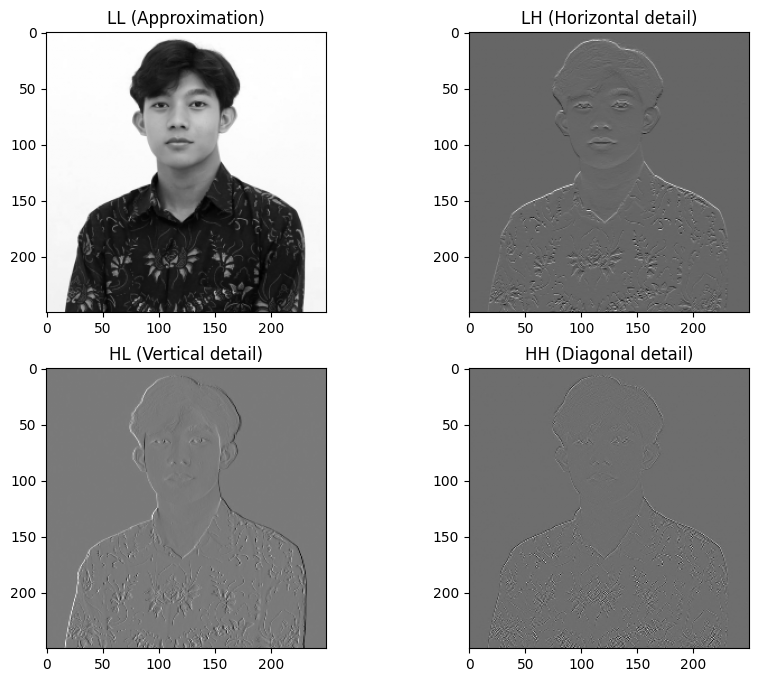

In [10]:
import pywt

# Wavelet Decomposition level 1
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# Visualisasi komponen
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(LL, cmap='gray'), plt.title("LL (Approximation)")
plt.subplot(222), plt.imshow(LH, cmap='gray'), plt.title("LH (Horizontal detail)")
plt.subplot(223), plt.imshow(HL, cmap='gray'), plt.title("HL (Vertical detail)")
plt.subplot(224), plt.imshow(HH, cmap='gray'), plt.title("HH (Diagonal detail)")
plt.show()
